In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

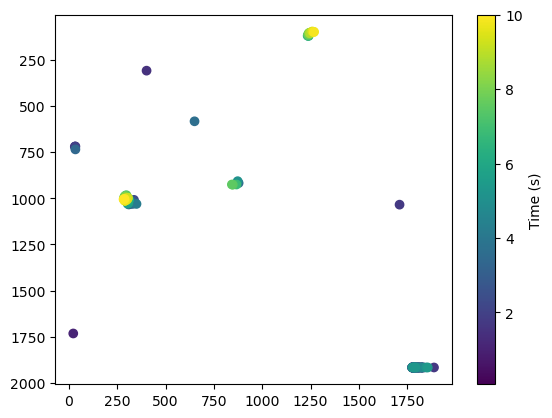

In [10]:
# open the video file
cap = cv2.VideoCapture('/Users/scliu/Dropbox (Personal)/Academics/PhD_phase/Thomson_Lab/local to global pre-print/manuscript and figures/figure_4/aster_connection/no_merge.avi')

# to store the brightest points
brightest_points = []

# get the total frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# get fps to calculate the time
fps = cap.get(cv2.CAP_PROP_FPS)

# loop over the frames from the video
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # find the brightest point
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    
    # store the maxLoc with frame index
    brightest_points.append((*maxLoc, cap.get(cv2.CAP_PROP_POS_FRAMES)/fps))

# close the video file
cap.release()

# convert to numpy array
brightest_points = np.array(brightest_points)

# plot the brightest points
sc = plt.scatter(brightest_points[:, 0], brightest_points[:, 1], c=brightest_points[:, 2])
plt.colorbar(sc, label='Time (s)')
plt.gca().invert_yaxis()  # invert y axis as in image coordinates, origin is at top left
plt.show()

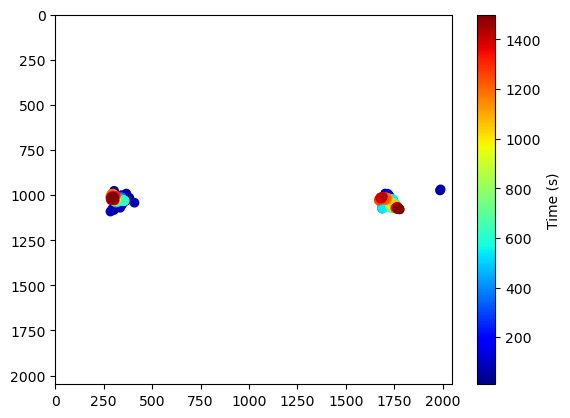

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# open the video file
cap = cv2.VideoCapture('/Users/scliu/Dropbox (Personal)/Academics/PhD_phase/Thomson_Lab/local to global pre-print/manuscript and figures/figure_4/aster_connection/no_merge.avi')

# to store the brightest points
brightest_points = []

# specify the y range
y_start = 948
y_end = 1113

# specify the x ranges
x_start1 = 0
x_end1 = 500
x_start2 = 1650
x_end2 = 2048

# loop over the frames from the video
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # convert frame to grayscale and crop
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cropped_gray1 = gray[y_start:y_end, x_start1:x_end1]
    cropped_gray2 = gray[y_start:y_end, x_start2:x_end2]

    for cropped_gray, x_offset in [(cropped_gray1, x_start1), (cropped_gray2, x_start2)]:
        # find the two brightest points
        flat_gray = cropped_gray.flatten()
        sorted_indices = np.argsort(flat_gray)
        bright1_index, bright2_index = sorted_indices[-1], sorted_indices[-2]
        bright1_loc = np.unravel_index(bright1_index, cropped_gray.shape)
        bright2_loc = np.unravel_index(bright2_index, cropped_gray.shape)

        # store the locations with frame index, each frame represents 10 seconds
        brightest_points.append((bright1_loc[0] + y_start, bright1_loc[1] + x_offset, cap.get(cv2.CAP_PROP_POS_FRAMES) * 10))
        brightest_points.append((bright2_loc[0] + y_start, bright2_loc[1] + x_offset, cap.get(cv2.CAP_PROP_POS_FRAMES) * 10))

# close the video file
cap.release()

# convert to numpy array
brightest_points = np.array(brightest_points)

# plot the brightest points with a broad color spectrum
sc = plt.scatter(brightest_points[:, 1], brightest_points[:, 0], c=brightest_points[:, 2], cmap='jet')
plt.colorbar(sc, label='Time (s)')
plt.gca().invert_yaxis()  # invert y axis as in image coordinates, origin is at top left

# manually set the plot limits
plt.xlim(0, 2048)
plt.ylim(2048, 0)

plt.show()


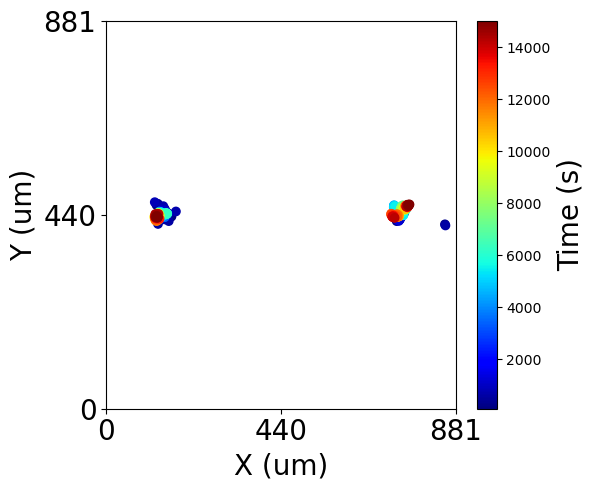

In [29]:
import matplotlib.ticker as ticker

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust as needed to get a square plot

# Plot the brightest points with a broad color spectrum
sc = ax.scatter(brightest_points[:, 1]*0.43, brightest_points[:, 0]*0.43, c=brightest_points[:, 2]*10, cmap='jet')

# Invert y-axis and set plot limits
ax.set_xlim(0, 2048 * 0.43)
ax.set_ylim(0, 2048 * 0.43)
ax.tick_params(axis='both', labelsize=20)


# Set x and y ticks
ax.set_xticks([0, 2048 * 0.43 / 2, 2048 * 0.43])
ax.set_yticks([0, 2048 * 0.43 / 2, 2048 * 0.43])

formatter = ticker.FormatStrFormatter('%.0f')
# Apply the formatter to the x and y axes
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# Set x and y labels
ax.set_xlabel('X (um)', fontsize=20)
ax.set_ylabel('Y (um)', fontsize=20)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Time (s)', fontsize=20)

plt.tight_layout()
plt.show()



In [23]:
brightest_points

array([[1.91600000e+03, 1.85600000e+03, 6.66666667e-02],
       [1.91600000e+03, 1.90400000e+03, 1.33333333e-01],
       [1.91600000e+03, 1.92800000e+03, 2.00000000e-01],
       [1.91600000e+03, 1.82400000e+03, 2.66666667e-01],
       [1.91600000e+03, 1.80000000e+03, 3.33333333e-01],
       [1.91600000e+03, 1.83200000e+03, 4.00000000e-01],
       [1.91600000e+03, 1.80800000e+03, 4.66666667e-01],
       [1.91600000e+03, 1.79200000e+03, 5.33333333e-01],
       [1.91600000e+03, 1.83200000e+03, 6.00000000e-01],
       [1.91600000e+03, 1.83200000e+03, 6.66666667e-01],
       [1.91600000e+03, 1.77600000e+03, 7.33333333e-01],
       [1.91600000e+03, 1.82400000e+03, 8.00000000e-01],
       [1.91600000e+03, 1.96000000e+03, 8.66666667e-01],
       [1.91600000e+03, 1.78400000e+03, 9.33333333e-01],
       [1.91600000e+03, 1.91200000e+03, 1.00000000e+00],
       [1.91600000e+03, 1.77600000e+03, 1.06666667e+00],
       [1.91600000e+03, 1.84800000e+03, 1.13333333e+00],
       [1.91600000e+03, 1.81600

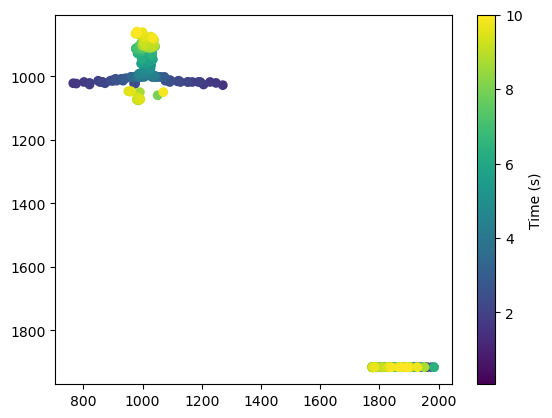

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label

# open the video file
cap = cv2.VideoCapture('/Users/scliu/Dropbox (Personal)/Academics/PhD_phase/Thomson_Lab/local to global pre-print/manuscript and figures/figure_4/aster_connection/yes_merge.avi')

# to store the brightest points
brightest_points = []

# get the total frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# get fps to calculate the time
fps = cap.get(cv2.CAP_PROP_FPS)

# define the threshold value
threshold_value = 200  # adjust this value to better isolate bright spots

# define the minimum area
min_area = 600

# loop over the frames from the video
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # threshold the image to isolate bright spots
    ret, thresholded = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

    # label the thresholded image
    labeled, num_labels = label(thresholded)

    # for each spot
    for i in range(1, num_labels + 1):
        # get the area of the spot
        area = np.sum(labeled == i)
        
        # if the area is larger than min_area
        if area > min_area:
            # find the brightest point in the spot
            spot = np.where(labeled == i, gray, 0)
            max_index = np.argmax(spot)
            max_loc = np.unravel_index(max_index, gray.shape)
            
            # store the location with frame index
            brightest_points.append((*max_loc, cap.get(cv2.CAP_PROP_POS_FRAMES) / fps))

# close the video file
cap.release()

# convert to numpy array
brightest_points = np.array(brightest_points)

# plot the brightest points
sc = plt.scatter(brightest_points[:, 1], brightest_points[:, 0], c=brightest_points[:, 2])
plt.colorbar(sc, label='Time (s)')
plt.gca().invert_yaxis()  # invert y axis as in image coordinates, origin is at top left
plt.show()


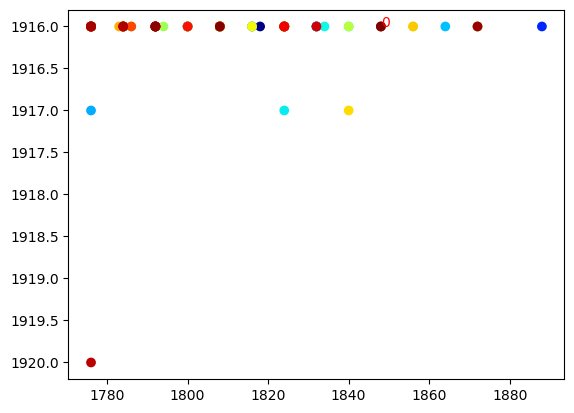

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# open the video file
cap = cv2.VideoCapture('your_video_file.mp4')

# to store the brightest points
brightest_points = []

# get the total frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# get fps to calculate the time
fps = cap.get(cv2.CAP_PROP_FPS)

# specify the y range
y_start = 948
y_end = 1113

# loop over the frames from the video
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # convert frame to grayscale and crop
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cropped_gray = gray[y_start:y_end, :]

    # find the two brightest points
    flat_gray = cropped_gray.flatten()
    sorted_indices = np.argsort(flat_gray)
    bright1_index, bright2_index = sorted_indices[-1], sorted_indices[-2]
    bright1_loc = np.unravel_index(bright1_index, cropped_gray.shape)
    bright2_loc = np.unravel_index(bright2_index, cropped_gray.shape)

    # store the locations with frame index, adjust the y location to account for the cropping
    brightest_points.append((bright1_loc[0] + y_start, bright1_loc[1], cap.get(cv2.CAP_PROP_POS_FRAMES)/fps))
    brightest_points.append((bright2_loc[0] + y_start, bright2_loc[1], cap.get(cv2.CAP_PROP_POS_FRAMES)/fps))

# close the video file
cap.release()

# convert to numpy array
brightest_points = np.array(brightest_points)

# plot the brightest points
sc = plt.scatter(brightest_points[:, 1], brightest_points[:, 0], c=brightest_points[:, 2])
plt.colorbar(sc, label='Time (s)')
plt.gca().invert_yaxis()  # invert y axis as in image coordinates, origin is at top left
plt.show()
